# Basic Imports

In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from numpy import arange

# Silent warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for visualization 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, date2num
%matplotlib inline
import seaborn as sns

# Libraries used for one hot encoding
from numpy import array, argmax
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Train_test_split function from sklearn to split the dataset
from sklearn.model_selection import train_test_split

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Performing grid search
from sklearn.model_selection import GridSearchCV 

# Confusion matrix
from sklearn.metrics import confusion_matrix
# Average precision score
from sklearn.metrics import average_precision_score
# Precision-Recall, AOC Curve
from inspect import signature
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

#Latex
from IPython.display import display, Math, Latex

# Feature Importance from XGBoost
from xgboost import plot_importance
from matplotlib import pyplot

# Data loading, cleaning and formatting

In [4]:
# Read in data into a dataframe
filename = "predictive_maintenance.csv"
device_telemetry_readings = pd.read_csv('predictive_maintenance.csv')

# Display top of dataframe
device_telemetry_readings.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [5]:
device_telemetry_readings.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


## Class Distribution

In [6]:
# The classes are heavily skewed we need to solve this issue later.
print('Non failure cases', round(device_telemetry_readings['failure'].value_counts()[0]/len(device_telemetry_readings) * 100,2), '% of the dataset')
print('Failure cases', round(device_telemetry_readings['failure'].value_counts()[1]/len(device_telemetry_readings) * 100,2), '% of the dataset')

Non failure cases 99.91 % of the dataset
Failure cases 0.09 % of the dataset


Notice how skewed the distribution of two different classes is in this data set. There are 0.09% cases of devices that have failed. This may lead to overfitting in our models, where models may not learn enough about the cases where devices have failed. 

## Visualizing Class Distribution

Text(0.5, 1.0, 'Class Distributions \n (0: Non failure || 1: Failure)')

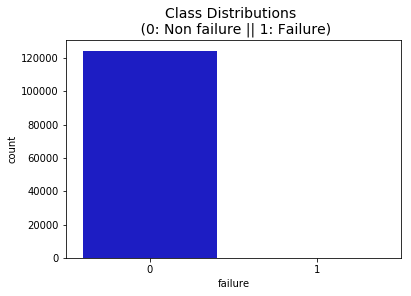

In [7]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('failure', data=device_telemetry_readings, palette=colors)
plt.title('Class Distributions \n (0: Non failure || 1: Failure)', fontsize=14)

In [8]:
device_telemetry_readings['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

Non failure cases do not even show up on the distribution above!

## Feature Distribution

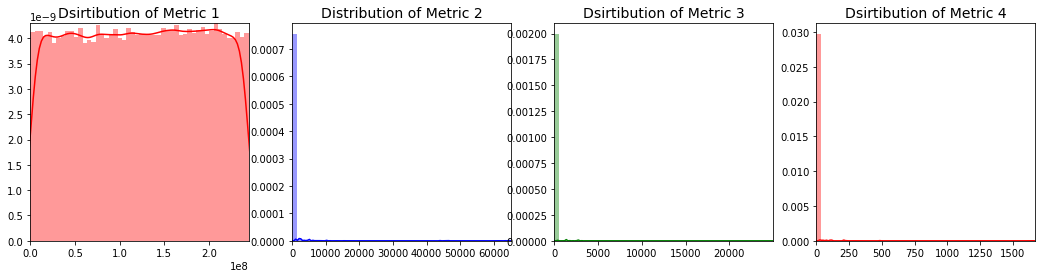

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

metric1 = device_telemetry_readings['metric1'].values
metric2 = device_telemetry_readings['metric2'].values
metric3 = device_telemetry_readings['metric3'].values
metric4 = device_telemetry_readings['metric4'].values
metric5 = device_telemetry_readings['metric5'].values
metric6 = device_telemetry_readings['metric6'].values
metric7 = device_telemetry_readings['metric7'].values
metric8 = device_telemetry_readings['metric8'].values
metric9 = device_telemetry_readings['metric9'].values
    
        
sns.distplot(metric1, ax=ax[0], color='r')
ax[0].set_title('Dsirtibution of Metric 1', fontsize=14)
ax[0].set_xlim([min(metric1), max(metric1)])

sns.distplot(metric2, ax=ax[1], color='b')
ax[1].set_title('Distribution of Metric 2', fontsize=14)
ax[1].set_xlim([min(metric2), max(metric2)])

sns.distplot(metric3, ax=ax[2], color='g')
ax[2].set_title('Dsirtibution of Metric 3', fontsize=14)
ax[2].set_xlim([min(metric3), max(metric3)])

sns.distplot(metric4, ax=ax[3], color='r')
ax[3].set_title('Dsirtibution of Metric 4', fontsize=14)
ax[3].set_xlim([min(metric4), max(metric4)])

plt.show()

(0, 18701)

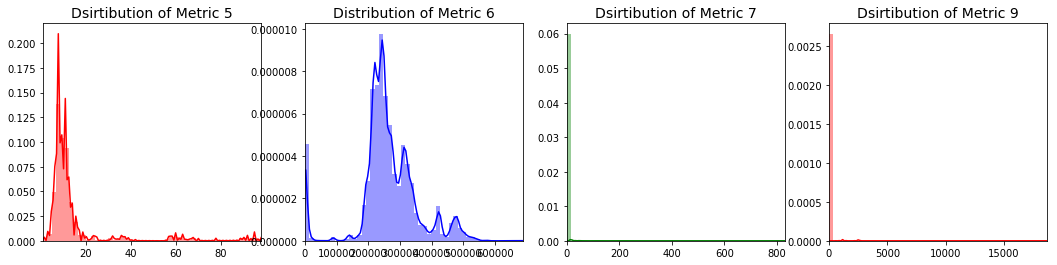

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

metric5 = device_telemetry_readings['metric5'].values
metric6 = device_telemetry_readings['metric6'].values
metric7 = device_telemetry_readings['metric7'].values
metric8 = device_telemetry_readings['metric8'].values
metric9 = device_telemetry_readings['metric9'].values
    
sns.distplot(metric5, ax=ax[0], color='r')
ax[0].set_title('Dsirtibution of Metric 5', fontsize=14)
ax[0].set_xlim([min(metric5), max(metric5)])

sns.distplot(metric6, ax=ax[1], color='b')
ax[1].set_title('Distribution of Metric 6', fontsize=14)
ax[1].set_xlim([min(metric6), max(metric6)])

sns.distplot(metric7, ax=ax[2], color='g')
ax[2].set_title('Dsirtibution of Metric 7', fontsize=14)
ax[2].set_xlim([min(metric7), max(metric7)])

sns.distplot(metric9, ax=ax[3], color='r')
ax[3].set_title('Dsirtibution of Metric 9', fontsize=14)
ax[3].set_xlim([min(metric9), max(metric9)])

# Creating a Sub-sample

Also, known as random under-sampling. 

Most effective way for training a model best identify failure cases is to make sure the sample contains plenty of instances of such cases. So we will creating a sub-sample that contains 50% instances of both cases. It helps us with the elimination of following two things:

* Overfitting: In the larger sample, model will over fit non-failure cases. While in a sub-sample that contains 50% instances of each class, issue of overfitting will be eliminated. 

* Wrong Correlations: Having a class imbalance may not reflect the right correlation between different variables. 

## Splitting the Dataset 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

print('Non-failure cases', round(device_telemetry_readings['failure'].value_counts()[0]/len(device_telemetry_readings) * 100,2), '% of the dataset')
print('Failure cases', round(device_telemetry_readings['failure'].value_counts()[1]/len(device_telemetry_readings) * 100,2), '% of the dataset')

X = device_telemetry_readings.drop('failure', axis=1)
y = device_telemetry_readings['failure']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish 
# and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Non-failure cases 99.91 % of the dataset
Failure cases 0.09 % of the dataset
Train: [ 23103  23140  24902 ... 124491 124492 124493] Test: [    0     1     2 ... 24899 24900 24901]
Train: [     0      1      2 ... 124491 124492 124493] Test: [23103 23140 24902 ... 55361 55388 57039]
Train: [     0      1      2 ... 124491 124492 124493] Test: [49796 49797 49798 ... 79048 79367 79379]
Train: [     0      1      2 ... 124491 124492 124493] Test: [ 74687  74688  74689 ...  99593 100915 101013]
Train: [     0      1      2 ...  99593 100915 101013] Test: [ 99594  99595  99596 ... 124491 124492 124493]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[9.99146552e-01 8.53447930e-04]
[9.99156559e-01 8.43441240e-04]


In [12]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = device_telemetry_readings.sample(frac=1)

# amount of failure classes 106 rows.
failure_df = df.loc[df['failure'] == 1]
non_failure_df = df.loc[df['failure'] == 0][:106]

normal_distributed_df = pd.concat([failure_df, non_failure_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
16420,1/19/15,Z1F0NVZA,1,21389544,0,0,60,10,209721,16,16,0
111201,8/8/15,W1F0VZF4,0,213020152,0,0,0,9,217842,0,0,0
72505,4/20/15,S1F0S7DN,0,40607584,0,0,0,9,327482,0,0,3
102720,7/14/15,S1F0S4EG,1,230884776,9264,0,12,6,269760,0,0,0
31125,2/9/15,W1F0T074,1,153874016,736,0,11,36,272772,0,0,0


In [101]:
new_df.shape

(212, 12)

In [13]:
# Making sure that we have a balanced class.
print('Non-failure cases', round(new_df['failure'].value_counts()[0]/len(new_df) * 100,2), '% of the dataset')
print('Failure cases', round(new_df['failure'].value_counts()[1]/len(new_df) * 100,2), '% of the dataset')

Non-failure cases 50.0 % of the dataset
Failure cases 50.0 % of the dataset


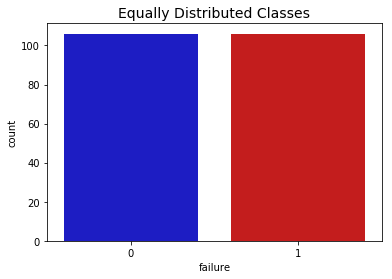

In [14]:
sns.countplot('failure', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

## Correlation Matrix

Pearson correlation coefficient is commonly used to quantify correlations (linear or non-linear) between features (various variables in the dataset) and target (failure in our dataset). Coefficient strength of 1 represents very strong linear correlation between a given feature and target, while -1 displays anti-correlation between the two. Correlation strength of 0 may represent flat (no relation) between feature and target or may represent non-linear relationship also.

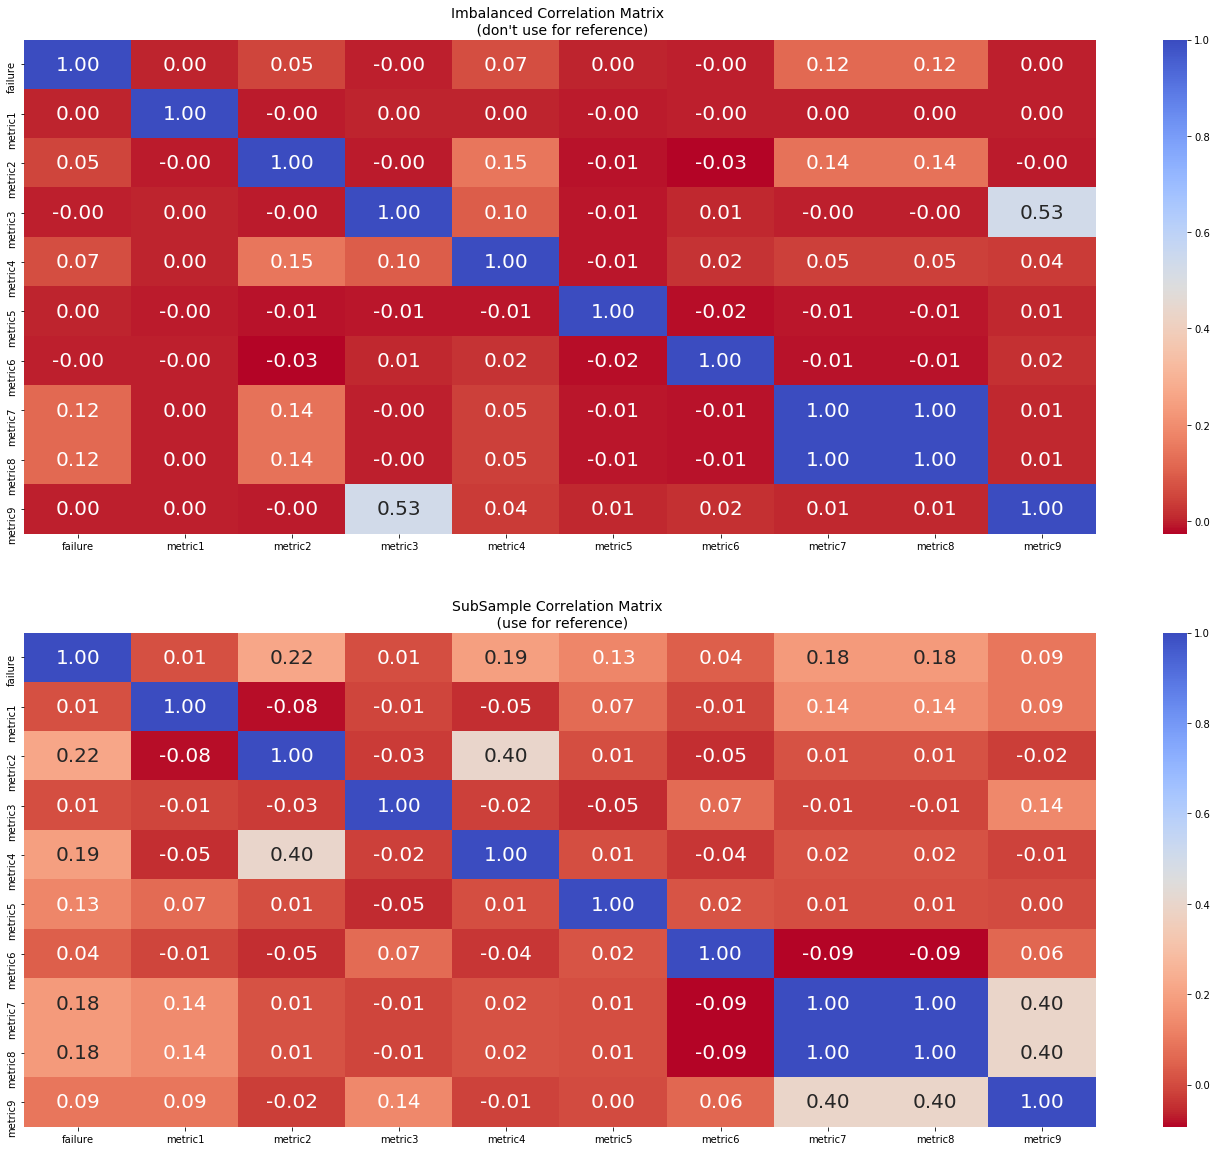

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = device_telemetry_readings.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, annot=True, fmt='.2f', cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

**Take-away message:** 
* Note enhanced Pearson correlation coefficient for metric 2 and 4 with the target variable in random under-sampled data set. 
* There is also fair amount of collinearity present between metric 2 & 4 and metric 9 & 3. 

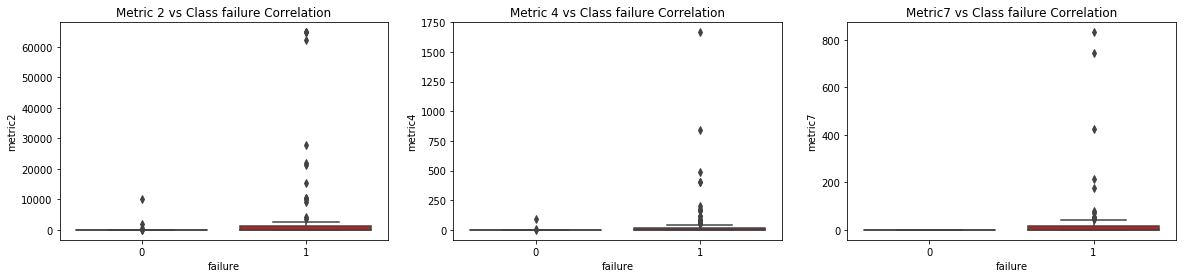

In [17]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="failure", y="metric2", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Metric 2 vs Class failure Correlation')

sns.boxplot(x="failure", y="metric4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Metric 4 vs Class failure Correlation')


sns.boxplot(x="failure", y="metric7", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('Metric7 vs Class failure Correlation')

plt.show()

**Take-away message:**

* Box plots show large number of outliers existing in each of these features. 

**Outlier Removal Tradeoff:**

We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will be detected (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect. 

The Tradeoff: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. One can play with this threshold and see how it affects the accuracy of our classification models.

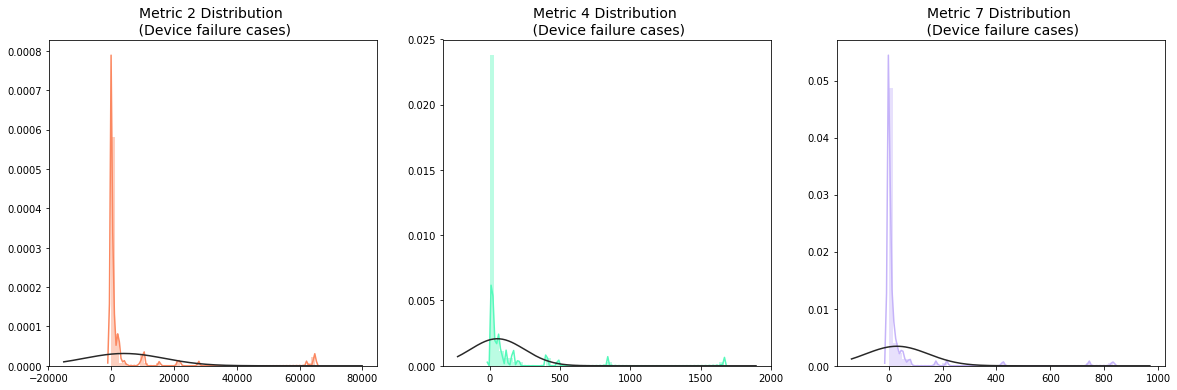

In [18]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

metric2_fraud_dist = new_df['metric2'].loc[new_df['failure'] == 1].values
sns.distplot(metric2_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Metric 2 Distribution \n (Device failure cases)', fontsize=14)

metric4_fraud_dist = new_df['metric4'].loc[new_df['failure'] == 1].values
sns.distplot(metric4_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Metric 4 Distribution \n (Device failure cases)', fontsize=14)


metric7_fraud_dist = new_df['metric7'].loc[new_df['failure'] == 1].values
sns.distplot(metric7_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Metric 7 Distribution \n (Device failure cases)', fontsize=14)

plt.show()

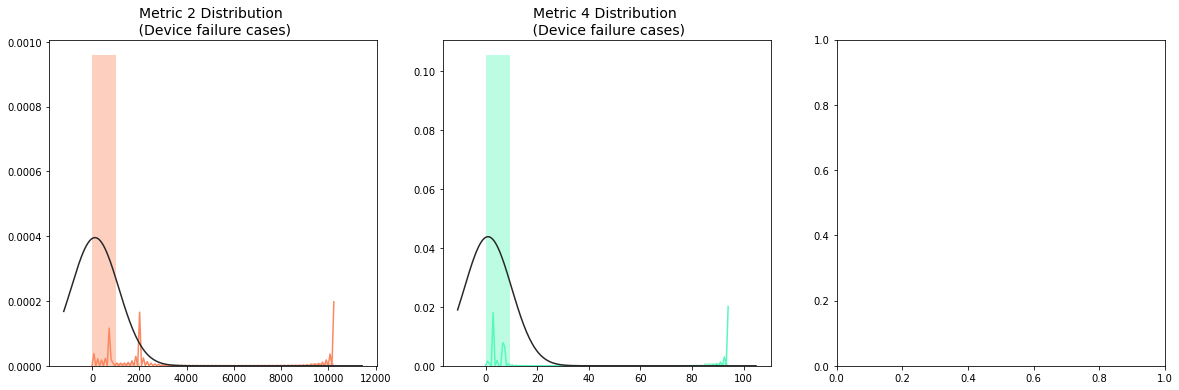

In [23]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

metric2_fraud_dist = new_df['metric2'].loc[new_df['failure'] == 0].values
sns.distplot(metric2_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Metric 2 Distribution \n (Device failure cases)', fontsize=14)

metric4_fraud_dist = new_df['metric4'].loc[new_df['failure'] == 0].values
sns.distplot(metric4_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Metric 4 Distribution \n (Device failure cases)', fontsize=14)


#metric7_fraud_dist = new_df['metric7'].loc[new_df['failure'] == 0].values
#sns.distplot(metric7_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
#ax3.set_title('Metric 7 Distribution \n (Device failure cases)', fontsize=14)

plt.show()

**Take-away message:** It is very interesting to note that for each of these metrics, values become extremely large for device failure cases. For example, metric 2 has highest values of 2500 for device non-failure cases, while for failure cases these values can jump upto as high as 80000. Similar observation for metric 4 and metric 7.  

## Removing outliers

In [24]:
# -----> Metric 2 removing outliers from fraud transactions
metric2_failure = new_df['metric2'].loc[new_df['failure'] == 1].values
q25, q75 = np.percentile(metric2_failure, 25), np.percentile(metric2_failure, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
metric2_iqr = q75 - q25
print('iqr: {}'.format(metric2_iqr))

metric2_cut_off = metric2_iqr * 1.5
metric2_lower, metric2_upper = q25 - metric2_cut_off, q75 + metric2_cut_off
print('Cut Off: {}'.format(metric2_cut_off))
print('V14 Lower: {}'.format(metric2_lower))
print('V14 Upper: {}'.format(metric2_upper))

outliers = [x for x in metric2_failure if x < metric2_lower or x > metric2_upper]
print('Feature Metric2 Outliers for Failure Cases: {}'.format(len(outliers)))
print('Metric2 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['metric2'] > metric2_upper) | (new_df['metric2'] < metric2_lower)].index)
print('----' * 44)

# -----> Metric 4 removing outliers from fraud transactions
metric4_failure = new_df['metric4'].loc[new_df['failure'] == 1].values
q25, q75 = np.percentile(metric4_failure, 25), np.percentile(metric4_failure, 75)
metric4_iqr = q75 - q25

metric4_cut_off = metric4_iqr * 1.5
metric4_lower, metric4_upper = q25 - metric4_cut_off, q75 + metric4_cut_off
print('Metric 4 Lower: {}'.format(metric4_lower))
print('Metric 4 Upper: {}'.format(metric4_upper))
outliers = [x for x in metric4_failure if x < metric4_lower or x > metric4_upper]
print('Metric 4 outliers: {}'.format(outliers))
print('Feature Metric 4 Outliers for Failure Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['metric4'] > metric4_upper) | (new_df['metric4'] < metric4_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers metric7 Feature
metric7_failure = new_df['metric7'].loc[new_df['failure'] == 1].values
q25, q75 = np.percentile(metric7_failure, 25), np.percentile(metric7_failure, 75)
metric7_iqr = q75 - q25

metric7_cut_off = metric7_iqr * 1.5
metric7_lower, metric7_upper = q25 - metric7_cut_off, q75 + metric7_cut_off
print('Metric 7 Lower: {}'.format(metric7_lower))
print('Metric 7 Upper: {}'.format(metric7_upper))
outliers = [x for x in metric7_failure if x < metric7_lower or x > metric7_upper]
print('Metric 7 outliers: {}'.format(outliers))
print('Feature Metric 7 Outliers for Failure Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['metric7'] > metric7_upper) | (new_df['metric7'] < metric7_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: 0.0 | Quartile 75: 1182.0
iqr: 1182.0
Cut Off: 1773.0
V14 Lower: -1773.0
V14 Upper: 2955.0
Feature Metric2 Outliers for Failure Cases: 15
Metric2 outliers:[9264, 10336, 10200, 21816, 10288, 64784, 10392, 62296, 21200, 64776, 3528, 15336, 4360, 64736, 27856]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Metric 4 Lower: -21.0
Metric 4 Upper: 35.0
Metric 4 outliers: [60, 55, 95, 80, 118, 58, 69, 486, 164, 39, 60, 401]
Feature Metric 4 Outliers for Failure Cases: 12
Number of Instances after outliers removal: 183
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Metric 7 Lower: -18.0
Metric 7 Upper: 30.0
Metric 7 outliers: [72, 80, 40, 48, 32, 48, 56, 32, 744, 32, 176, 832, 48]
Feature Metric 7 Outliers for Failure Cases: 1

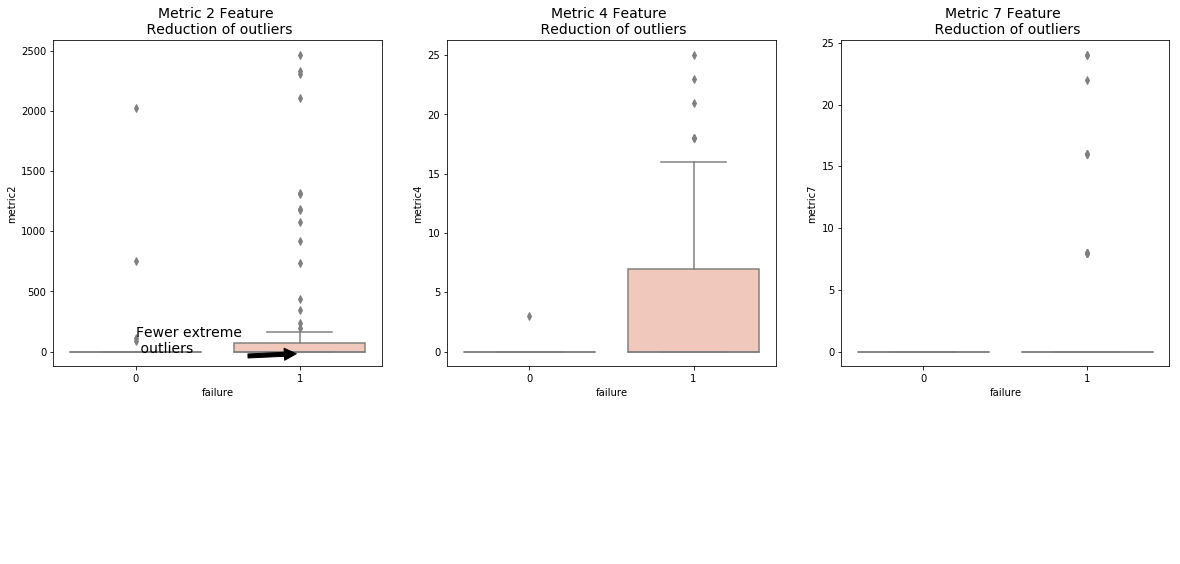

In [25]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature Metric 2
sns.boxplot(x="failure", y="metric2", data=new_df,ax=ax1, palette=colors)
ax1.set_title("Metric 2 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature Metric 4
sns.boxplot(x="failure", y="metric4", data=new_df, ax=ax2, palette=colors)
ax2.set_title("Metric 4 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature Metric 4
sns.boxplot(x="failure", y="metric7", data=new_df, ax=ax3, palette=colors)
ax3.set_title("Metric 7 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

plt.show()


## Encoding device ID

In [26]:
# Code for encoding categorical feature, device 
data = new_df[['device']]
values = array(data)

# Integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# Adding encoded values in the original data frame
new_df['device_encoded'] = ''
new_df['device_encoded'] = integer_encoded

In [27]:
new_df = new_df.drop(['date','device'], axis=1)

In [28]:
new_df.columns

Index(['failure', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5',
       'metric6', 'metric7', 'metric8', 'metric9', 'device_encoded'],
      dtype='object')

# Machine Learning Classifiers

In [29]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('failure', axis=1)
y = new_df['failure']

In [30]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((136, 10), (34, 10), (136,), (34,))

In [32]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [33]:
# Let's implement simple classifiers

classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

In [34]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 59.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 52.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 79.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 72.0 % accuracy score


In [35]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [36]:
tree_clf, knears_neighbors, log_reg

(DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=5, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=2, p=2,
            weights='uniform'),
 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l1', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))

In [37]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  80.33%
Knears Neighbors Cross Validation Score 57.31%
DecisionTree Classifier Cross Validation Score 76.43%


## Displaying training and cross-validation scores for various models

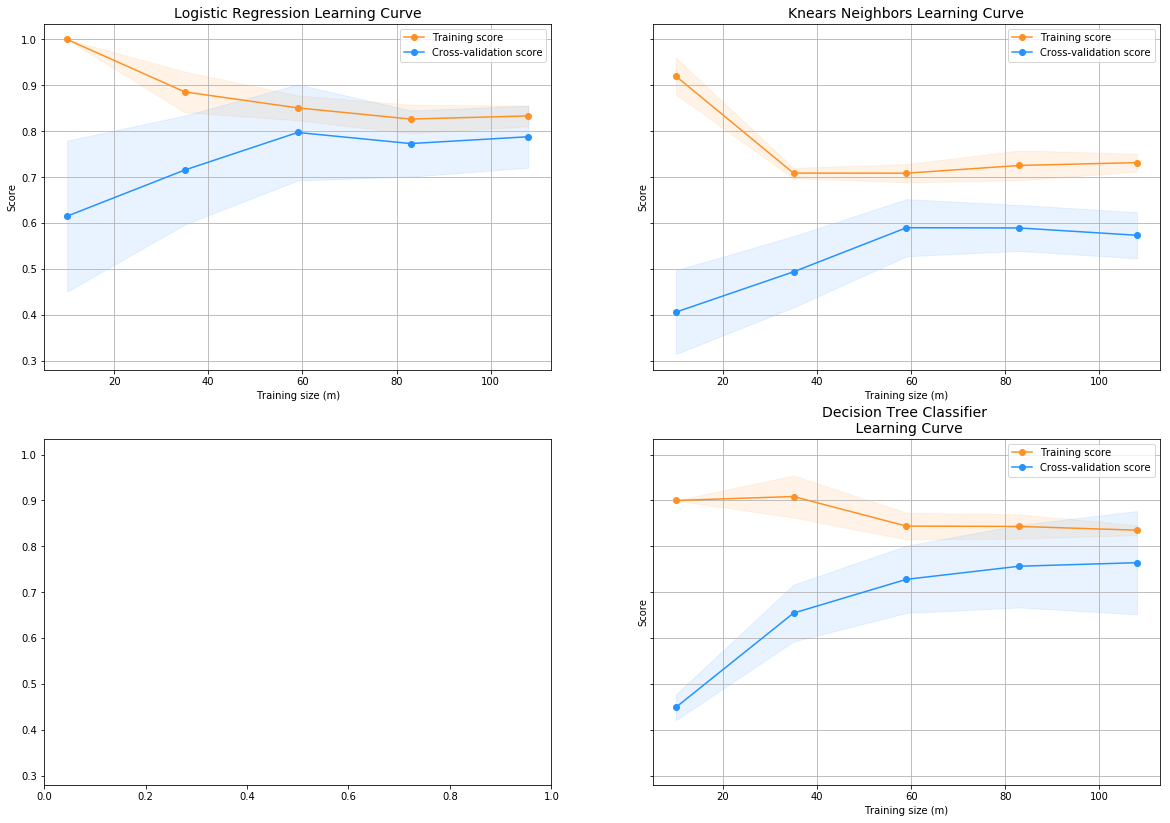

In [47]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    
# First Estimator
train_sizes, train_scores, test_scores = learning_curve(
        log_reg, X_train, y_train, cv=5, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
ax1.set_xlabel('Training size (m)')
ax1.set_ylabel('Score')
ax1.grid(True)
ax1.legend(loc="best")

# Second Estimator 
train_sizes, train_scores, test_scores = learning_curve(
        knears_neighbors, X_train, y_train, cv=5, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
ax2.set_xlabel('Training size (m)')
ax2.set_ylabel('Score')
ax2.grid(True)
ax2.legend(loc="best")

# Third Estimator
train_sizes, train_scores, test_scores = learning_curve(
        tree_clf, X_train, y_train, cv=5, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
ax4.set_xlabel('Training size (m)')
ax4.set_ylabel('Score')
ax4.grid(True)
ax4.legend(loc="best")

## Displaying ROC curves for various models

In [48]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

#svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
#                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [49]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.7672198226869744
KNears Neighbors:  0.4903387133439418
Decision Tree Classifier:  0.7494885201182087


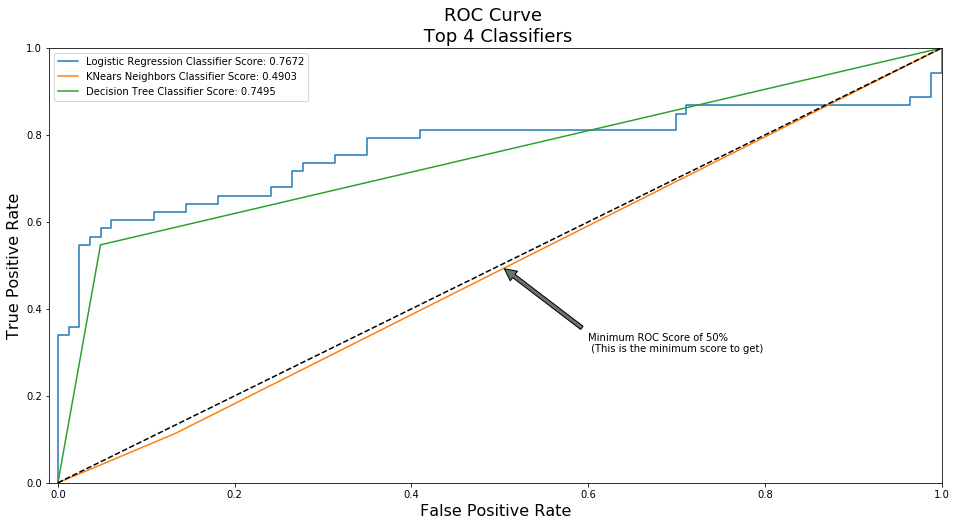

In [51]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr)
plt.show()

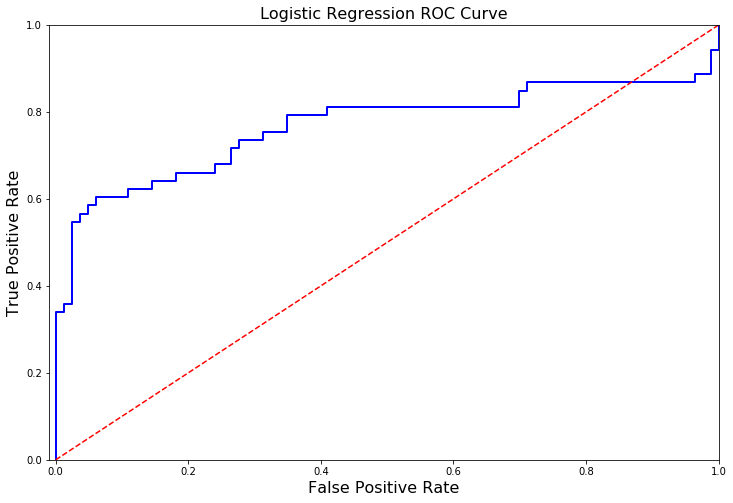

In [52]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

# Confusion Matrix

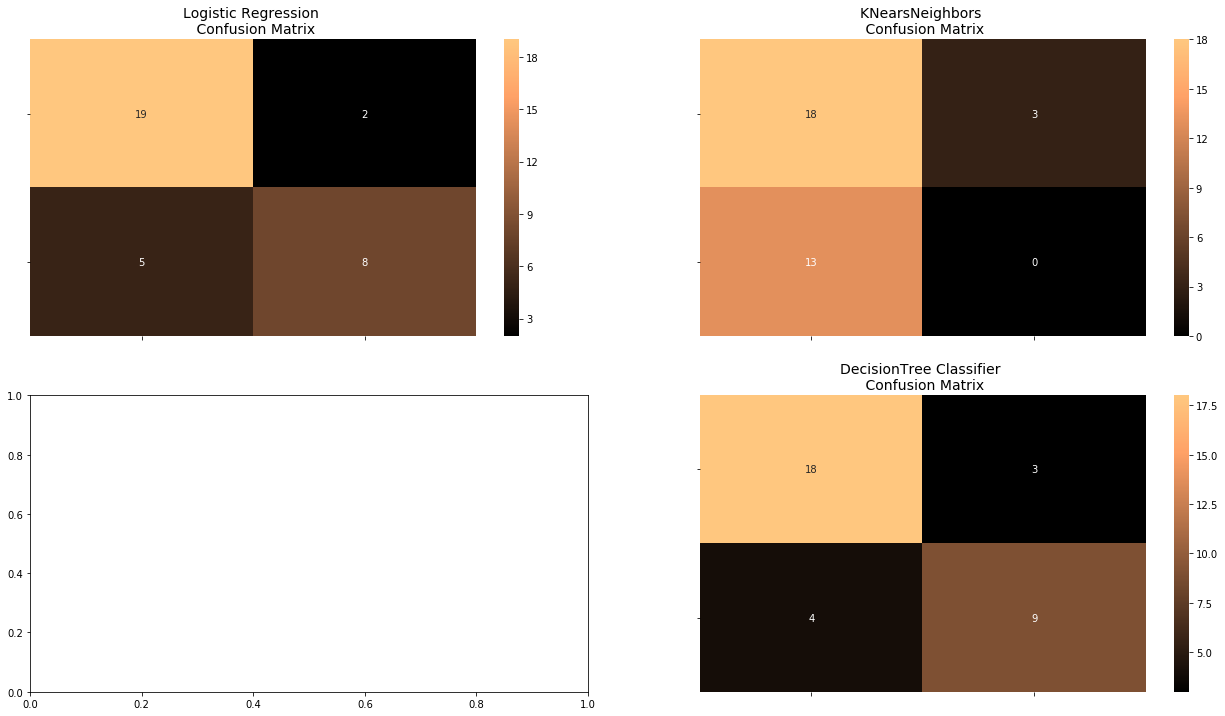

In [56]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [57]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.80      0.62      0.70        13

   micro avg       0.79      0.79      0.79        34
   macro avg       0.80      0.76      0.77        34
weighted avg       0.79      0.79      0.79        34

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.58      0.86      0.69        21
           1       0.00      0.00      0.00        13

   micro avg       0.53      0.53      0.53        34
   macro avg       0.29      0.43      0.35        34
weighted avg       0.36      0.53      0.43        34

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.75      0.69      0.72        13

   micro avg       0.79      0.79      0.79        34
   macro avg       0.78      0.77      0.78        34
weighted 

# Closing statements for this project

**Confusion Matrix** is the correct metric to assess a classification type problem. The aim is to minimize the off-diagonal elements while maximizing diagonal elements. Looking at the results above looks like decision tree classifier is able to minimize false negatives and false positives while maximizing true negative and true positives. 